In [1]:
#Importing all the libraries:
import numpy as np
import pandas as pd
import sweetviz 
#import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(9)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
5,5,0.0,1.052469,0.099592,1.077244,1.370024,-0.471625,0.238658,-0.281837,0.055925,...,-0.013418,0.210670,-0.031069,0.131544,0.452867,-0.376528,0.086428,0.049083,35.97,0
6,6,0.0,1.206129,0.420150,-0.358910,1.037382,0.735224,-0.082449,0.568558,-0.158037,...,-0.366513,-1.113867,0.042265,-0.819477,0.473615,-0.639652,0.006812,0.016747,36.00,0
7,7,0.0,-1.074970,-0.297535,-0.884465,0.065341,-0.239956,0.349602,1.756880,0.054202,...,0.624183,0.908389,-0.233799,-0.457045,0.551736,-0.064708,0.137524,0.203869,440.00,0
8,8,0.0,2.154065,-0.000479,-2.125939,-0.121096,0.918473,-0.208507,0.226055,-0.236828,...,0.243716,0.780992,-0.148060,-0.280708,0.507044,-0.420133,-0.037652,-0.079346,1.00,0


In [4]:
train.tail(9)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
219120,219120,120579.0,-0.452945,1.179527,0.771899,0.818185,1.385577,-0.859759,1.936775,-0.534817,...,0.071298,0.375935,-0.501082,0.066176,1.222524,-0.204249,-0.108968,-0.163026,49.95,0
219121,219121,120579.0,-0.686799,0.878784,0.042715,-0.694059,0.880029,-0.731699,0.775079,0.246499,...,0.303718,0.701771,-0.290839,0.822245,0.292489,0.806749,-0.141406,-0.064758,0.99,0
219122,219122,120580.0,-1.037292,0.391218,-0.122948,-0.591344,0.472548,-1.277947,0.263934,0.407391,...,-0.186909,-0.744238,0.005501,-0.142446,0.010199,-0.170980,0.134517,-0.091581,59.15,0
219123,219123,120580.0,-0.652924,-0.078582,1.690696,1.108293,-0.403000,0.245718,0.251859,0.195329,...,0.243944,0.591399,0.243412,-0.130634,-0.449577,-0.302568,0.166764,0.192377,128.00,0
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0
219128,219128,120580.0,-0.431758,1.299171,-0.571602,-1.161499,1.141765,-1.258871,1.701553,-0.454580,...,0.225629,0.988442,-0.224609,0.082977,-0.335529,0.042237,0.304965,0.240049,3.78,0


In [5]:
train.shape

(219129, 32)

In [6]:
test.shape

(146087, 31)

In [7]:
test.head(9)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98
5,219134,120581.0,-2.917054,0.332300,0.738487,-2.611142,0.715475,1.295536,-0.019965,0.695776,...,-0.505513,-0.056434,-0.165928,-0.532125,-0.918683,0.342380,0.553516,-0.782526,-0.089565,4.58
6,219135,120581.0,1.943914,-0.246766,-1.749592,0.351744,0.297945,-1.278818,0.619363,-0.468734,...,0.003989,0.004468,-0.122938,0.116724,-0.303537,-0.133514,0.367747,-0.116512,-0.071780,89.99
7,219136,120581.0,2.055286,-0.270588,-3.426773,-1.096434,2.955984,2.847826,-0.019754,0.636386,...,-0.125848,0.139898,0.325926,0.049353,0.714928,0.374717,-0.357979,-0.024047,-0.069653,23.99
8,219137,120581.0,1.786816,-1.101709,1.304714,0.839487,-2.028244,0.369870,-1.444412,0.339908,...,-0.104789,0.078881,0.848405,0.174950,0.543044,-0.439453,0.771877,0.023049,-0.019980,45.90


In [8]:
test.tail()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
146082,365211,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
146083,365212,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
146084,365213,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99
146085,365214,172790.0,-1.889979,-0.154869,0.068496,-1.906964,-1.743181,0.717490,0.981608,-0.209713,...,-0.513829,0.121457,0.764642,-0.217844,0.104599,-0.008906,-0.204957,-0.752326,-0.155728,314.00
146086,365215,172790.0,2.058491,-1.472979,-1.948388,-1.895306,1.160925,3.611489,-1.567759,0.813258,...,0.178640,0.351114,0.835645,0.128687,0.743448,-0.145395,-0.065332,0.023910,-0.045230,69.00


# Analyzing in single dataframe

In [ ]:
auto_analysis = sweetviz.analyze([train, "Train"], target= )

In [ ]:
autoEDA = sweetviz.analyze(train)

In [ ]:
autoEDA.show_html('autoEDA.html')

# My own EDA

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

In [14]:
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,219129.0,109564.000000,63257.237906,0.000000,54782.000000,109564.000000,164346.000000,219128.000000
Time,219129.0,62377.415376,25620.348569,0.000000,47933.000000,63189.000000,77519.000000,120580.000000
V1,219129.0,0.096008,1.395425,-29.807725,-0.846135,0.385913,1.190661,2.430494
V2,219129.0,0.048345,1.159805,-44.247914,-0.573728,0.046937,0.814145,16.068473
V3,219129.0,0.592102,1.132884,-19.722872,-0.027154,0.735895,1.306110,6.145578
V4,219129.0,0.069273,1.253125,-5.263650,-0.769256,0.064856,0.919353,12.547997
V5,219129.0,-0.161555,1.069530,-37.591259,-0.847346,-0.229929,0.356856,34.581260
V6,219129.0,0.133688,1.202411,-25.659750,-0.631835,-0.087778,0.482388,16.233967
V7,219129.0,-0.128224,0.817207,-31.179799,-0.646730,-0.098970,0.385567,39.824099
V8,219129.0,0.149534,0.716212,-28.903442,-0.095948,0.111219,0.390976,18.270586


In [15]:
test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,146087.0,292172.000000,42171.828725,219129.000000,255650.500000,292172.000000,328693.500000,365215.000000
Time,146087.0,144637.928166,14258.025396,120580.000000,132698.000000,144493.000000,156140.000000,172790.000000
V1,146087.0,0.512929,1.628455,-34.755944,-0.679988,0.285798,1.974015,2.452901
V2,146087.0,-0.013098,1.247749,-37.803827,-0.715885,0.009058,0.827420,12.390128
V3,146087.0,-0.697478,1.292522,-18.934952,-1.619268,-0.719060,0.073874,4.492640
V4,146087.0,-0.273258,1.365752,-5.497560,-1.021205,-0.482945,0.369725,11.232928
V5,146087.0,0.321856,1.146215,-25.639591,-0.418547,0.306851,0.955997,24.352818
V6,146087.0,-0.050204,1.332880,-14.133040,-0.891441,-0.372813,0.302724,16.596635
V7,146087.0,0.073419,0.946681,-18.715915,-0.570042,0.118545,0.734503,27.023955
V8,146087.0,0.043803,0.749513,-26.926164,-0.231824,0.014979,0.296969,12.098322


In [16]:
train.duplicated().sum()

0

In [17]:
test.duplicated().sum()

0

In [18]:
train.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
test.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [20]:
# This dataset is about 33.94 hours mean for 1.3 day of transaction.This dataset is about 219128 two lack ninteen thousand one hundrad and wo eight

In [21]:
train['Class'].value_counts()

0    218660
1       469
Name: Class, dtype: int64

In [22]:
train['Class'].value_counts(normalize=True)

0    0.99786
1    0.00214
Name: Class, dtype: float64

In [23]:
train.corr()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,0.959218,-0.000277,0.047263,-0.192427,-0.045618,0.129347,0.017377,0.054348,-0.010406,...,0.019785,0.062143,0.029664,-0.015734,-0.135347,-0.035469,0.002326,-0.021846,-0.021374,0.008551
Time,0.959218,1.000000,0.020667,0.017150,-0.217963,-0.047875,0.125820,0.019394,0.048767,-0.012936,...,0.036436,0.084565,0.030906,-0.015779,-0.134160,-0.044146,-0.000651,-0.025088,-0.006316,0.006889
V1,-0.000277,0.020667,1.000000,-0.301975,-0.237078,0.060526,-0.102238,0.076384,-0.209567,-0.095881,...,-0.075561,-0.020109,-0.050983,-0.039148,0.256438,-0.000983,-0.001242,0.042269,-0.115158,-0.039251
V2,0.047263,0.017150,-0.301975,1.000000,0.038095,0.146428,0.243717,-0.082277,0.292088,0.034800,...,-0.078165,-0.032399,0.022669,0.004399,-0.150464,-0.038489,0.057503,0.008125,-0.563721,0.012451
V3,-0.192427,-0.217963,-0.237078,0.038095,1.000000,0.058966,-0.215220,-0.130293,0.052614,-0.026637,...,0.025458,0.156739,-0.030509,-0.008280,-0.153387,0.010866,0.049136,0.011003,-0.141140,-0.054008
V4,-0.045618,-0.047875,0.060526,0.146428,0.058966,1.000000,0.004642,-0.011888,0.096579,-0.002872,...,0.047631,0.054381,-0.008109,-0.048903,0.034450,-0.065007,-0.002757,0.021489,0.061920,0.027977
V5,0.129347,0.125820,-0.102238,0.243717,-0.215220,0.004642,1.000000,0.331088,0.259276,0.051261,...,-0.054922,-0.104722,-0.027975,0.047332,-0.007738,-0.048584,0.020277,-0.035526,-0.313477,0.010144
V6,0.017377,0.019394,0.076384,-0.082277,-0.130293,-0.011888,0.331088,1.000000,-0.232957,0.274289,...,0.009065,-0.015250,-0.027498,0.076797,0.103363,0.001758,0.018537,0.007954,0.076731,-0.004217
V7,0.054348,0.048767,-0.209567,0.292088,0.052614,0.096579,0.259276,-0.232957,1.000000,-0.136652,...,-0.013802,-0.080196,-0.047698,-0.011064,-0.135634,-0.032033,-0.034344,0.016396,0.186247,-0.024589
V8,-0.010406,-0.012936,-0.095881,0.034800,-0.026637,-0.002872,0.051261,0.274289,-0.136652,1.000000,...,0.005931,0.020232,0.017078,0.035852,-0.020029,0.011455,0.028751,0.011465,-0.080585,-0.037774


# Visiualizaion:

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

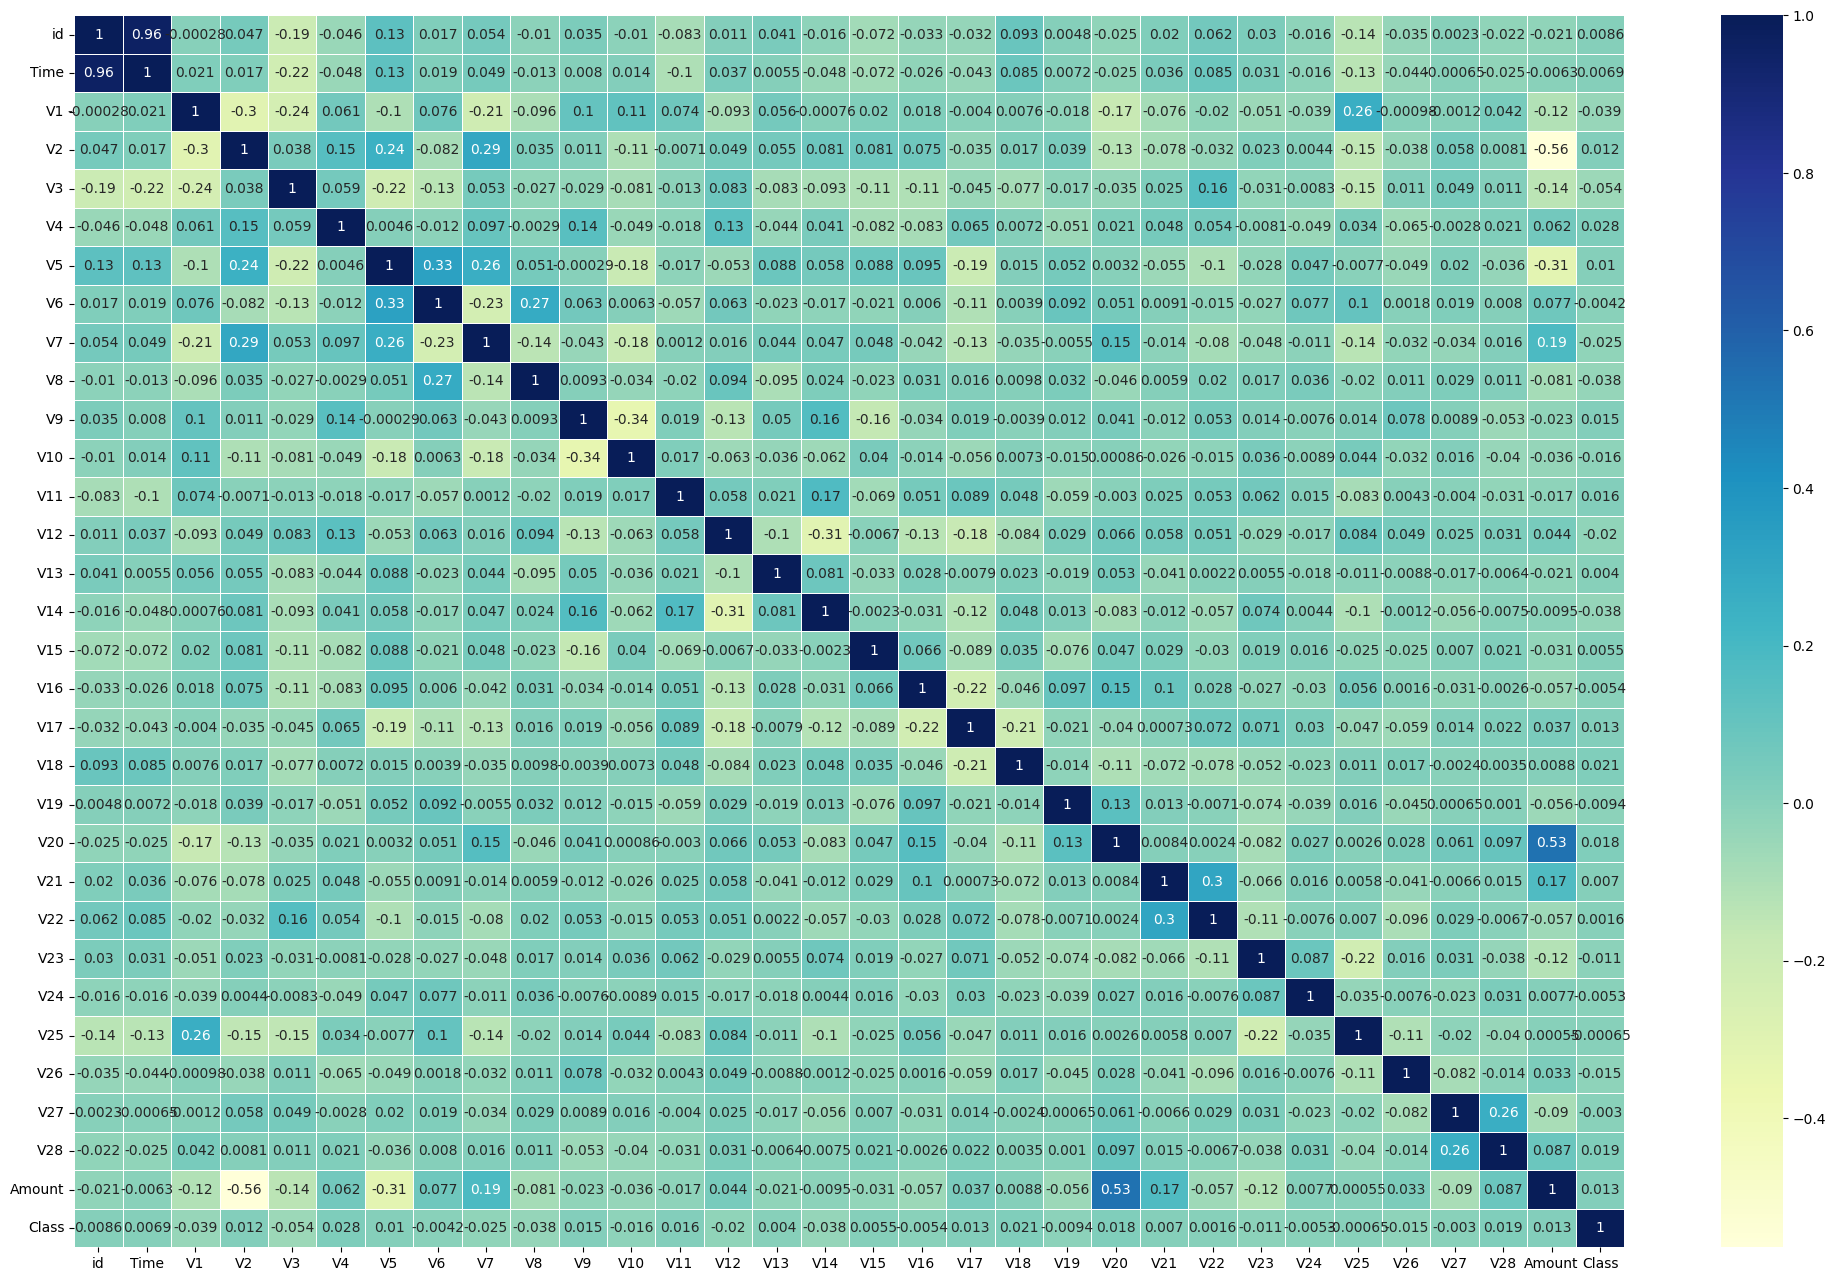

In [27]:
#Applying Heatmap
feature_train = train.corr()
heat_map = feature_train.index
plt.figure(figsize=(25,16))
visual_heat=sns.heatmap(train[heat_map].corr(),annot=True,cmap="YlGnBu", linewidths=.5)

In [28]:
LABELS = ["Normal", "Fraud"]

([<matplotlib.axis.XTick at 0x277f7ac8ac0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

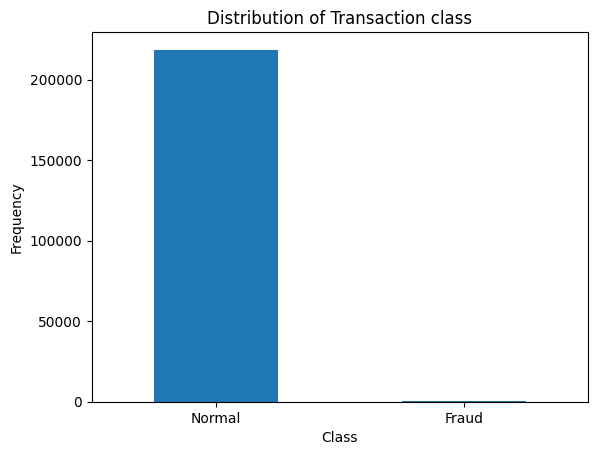

In [29]:
#Applying Plotbar:
plt.title("Distribution of Transaction class")
total_classes = pd.value_counts(train['Class'], sort = True)
total_classes.plot(kind = "bar", rot = 0)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(2), LABELS)

In [30]:
normal_data = train[train['Class'] == 0]
fraud_data = train[train['Class'] == 1]

In [ ]:
# Applying Mathameical 
normal_data.describe()

In [31]:
fraud_data.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,...,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.0
mean,121243.722814,66188.392324,-1.086640,0.360162,-0.729018,0.826276,0.072711,0.024195,-0.562112,-0.434633,...,0.032385,-0.030467,-0.125792,-0.071228,0.118310,-0.147291,-0.001152,0.085422,108.391002,1.0
std,67374.938718,27776.806184,3.202974,4.255666,2.759541,1.786987,2.164791,1.821944,2.465869,2.397392,...,1.259590,0.804570,1.125668,0.644059,0.589565,0.463175,0.748919,1.168934,376.603036,0.0
min,1681.000000,764.000000,-23.735245,-44.247914,-19.088980,-4.044858,-16.143833,-16.357833,-21.876190,-17.374875,...,-6.567663,-5.109636,-8.895803,-1.857683,-3.958591,-1.343868,-9.234767,-3.310876,0.000000,1.0
25%,63361.000000,50907.000000,-1.827097,-0.219947,-1.679817,-0.104799,-0.784489,-0.907924,-0.918130,-0.359011,...,-0.246089,-0.480110,-0.217749,-0.439481,-0.228727,-0.418924,-0.041335,-0.044723,1.000000,1.0
50%,131980.000000,69297.000000,-0.597535,0.588968,-0.251228,0.812230,0.015662,-0.124916,-0.269415,0.022567,...,-0.034481,-0.009526,-0.046046,-0.041213,0.116638,-0.252230,0.036790,0.027947,8.760000,1.0
75%,183572.000000,82563.000000,1.122965,1.637133,0.888828,1.505569,0.858477,0.664157,0.376847,0.446651,...,0.187923,0.490126,0.110160,0.385332,0.486712,0.092445,0.132959,0.131848,39.950000,1.0
max,219086.000000,120573.000000,2.169813,9.275076,3.697068,8.918977,20.976643,7.363600,15.923791,14.073865,...,8.097728,3.066008,5.312675,1.135796,2.420944,2.658908,1.967485,23.263746,4471.960000,1.0


# Modeling

In [32]:
sample_train = train.sample(random_state = 1, frac = 0.1,)
print(sample_train.shape)
print(train.shape)

(21913, 32)
(219129, 32)


In [33]:
normal_0 = sample_train[sample_train['Class']==0]
Fraud_1 = sample_train[sample_train['Class']==1]

In [ ]:
#Applying formula for outlier:

In [34]:
outlier = len(Fraud_1)/float(len(normal_0))

In [ ]:
#First Applying RandomForest Classifier:

In [41]:
df= train[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]
X = df.copy()

y = train['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
loan = RandomForestClassifier()
loan.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
predictions_loan = loan.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_loan, y_test))

In [ ]:
#As RandomForest Accuracy is 0.997 mean 99.7%

In [ ]:
 #Here now applying Classification algorithms.For more accurate results Support vector machine.

In [35]:
from sklearn.ensemble import IsolationForest
target = 'Class'
# Applying feaures;
total_columns = sample_train.columns.tolist()
#Removing data in total_column;
total_columns = [c for c in total_columns if c not in ["Class"]]

In [36]:
# for Random state;
import numpy as np
state = np.random.RandomState(42)
X = sample_train[total_columns]
Y = sample_train[target]
X_outliers = state.uniform(high=1,low=0, size=(X.shape[0], X.shape[1]))

In [37]:
X.shape

(21913, 31)

In [38]:
Y.shape

(21913,)

In [39]:
# Applying Local Outlier Factor LOF And Isolation Forest:
from sklearn.neighbors import LocalOutlierFactor
LOF_IF_classifier = {"Local Outlier Factor":LocalOutlierFactor(n_neighbors=18, leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None,algorithm='auto', contamination=outlier),
                 "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier,random_state=state, verbose=0),}

In [40]:
n_outliers = len(Fraud_1)
for m, (data_name,data) in enumerate(LOF_IF_classifier.items()):
    
    #Fit the data and tag outliers
    if data_name == "Local Outlier Factor":
        y_prediction = data.fit_predict(X)
        scores_prediction = data.negative_outlier_factor_
   
    else:    
        data.fit(X)
        scores_prediction = data.decision_function(X)
        y_pred = data.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_prediction[y_prediction == 1] = 0
    y_prediction[y_prediction == -1] = 1
    n_errors = (y_prediction != Y).sum()

    print('{}: {}'.format(data_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_prediction))
    print("LOF_IF_classifier Report :")
    #print(Classification Report(Y,y_prediction))


Local Outlier Factor: 141
Accuracy Score :
0.9935654634235386
LOF_IF_classifier Report :


C:\Users\ha\anaconda3\envs\Machinelearning\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 72
Accuracy Score :
0.9967142791949984
LOF_IF_classifier Report :


# Conclusion:


It shown that the Local Outlier detect 141 error as compare to Isolation Forest errors 72.
The accuracy of Isolation Forest is 99.6% more than Local Outlier Factor 99.3%
on the other hand RandomForest is 99.7% accurate.

